In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/RA2_alpine_lads/ra_joint_predictions')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import tensorflow as tf
from utils.config import Config

configuration = Config()

from dataset import joint_dataset, rsna_joint_dataset

In [3]:
from dataset.joints import joint_extractor

In [20]:
rsna_extractor = joint_extractor.width_based_joint_extractor(joint_scale = 5., height_scale = 1.2, key_joint_scales = {}, key_height_scales = {})
train_ds, val_ds = rsna_joint_dataset.rsna_joint_dataset(configuration, pad_resize = False, joint_extractor = rsna_extractor).create_rsna_joints_dataset(val_split = True, include_wrist_joints = False)



2020-03-31 15:25:40,806;WARNING - Missing permissions to create directory for caching!


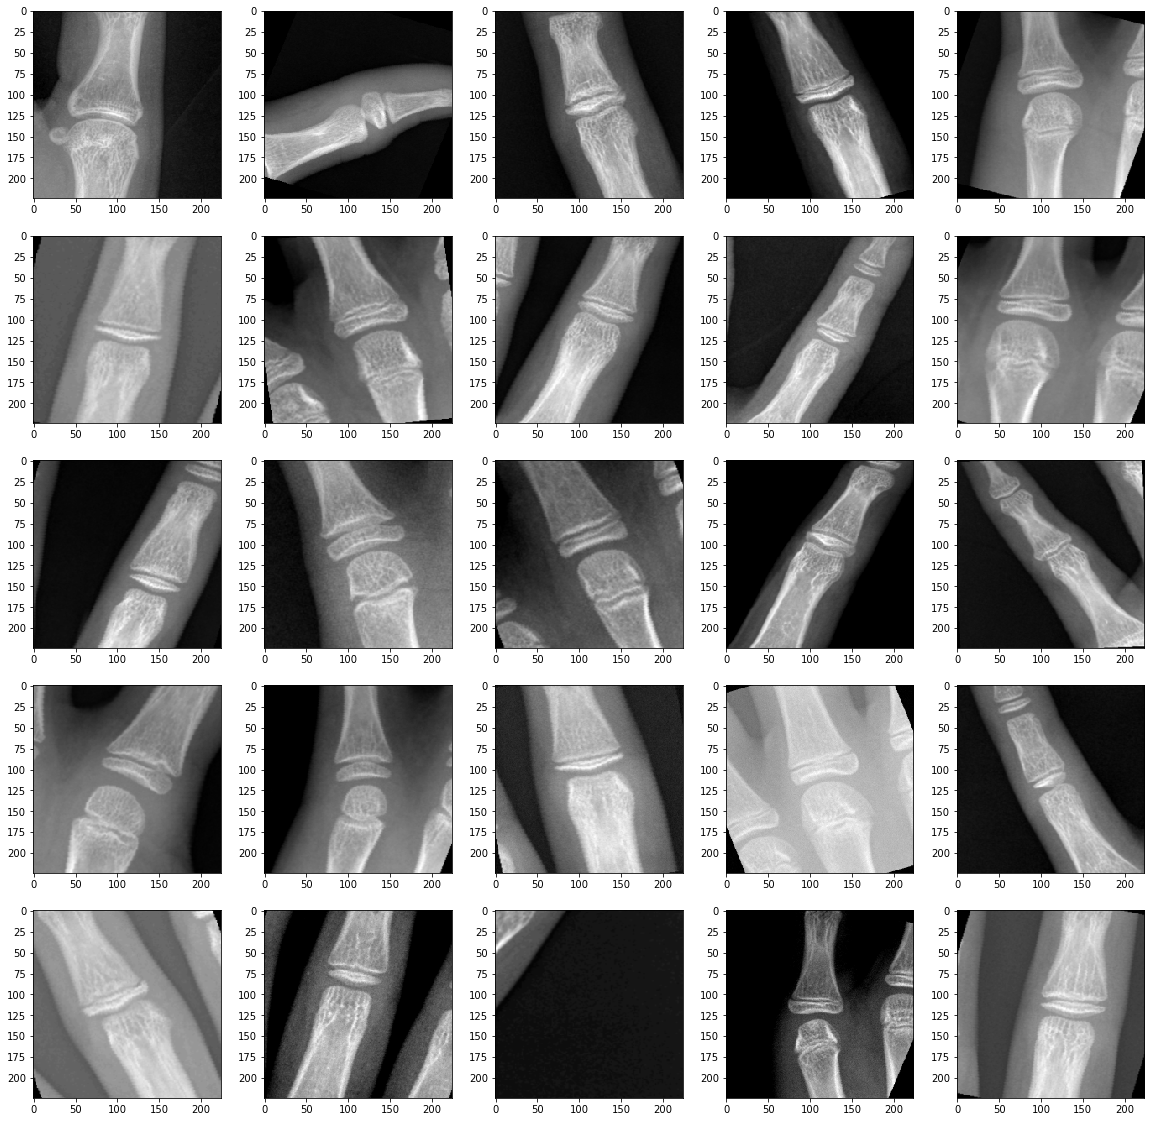

In [21]:
for a,b in train_ds.take(1):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")

In [22]:
erosion_hand_extractor = joint_extractor.width_based_joint_extractor(joint_scale = 4.5, height_scale = 1.2, key_joint_scales = {}, key_height_scales = {})
train_ds = joint_dataset.hands_joints_dataset(configuration, pad_resize = False, joint_extractor = erosion_hand_extractor).create_hands_joints_dataset(outcomes_source = "/mnt/iusers01/jw01/mdefscs4/ra_challenge/RA_challenge/training_dataset/training.csv")


2020-03-31 15:25:54,465;INFO - Outcome 0, found outliers weights [70.66666667]
2020-03-31 15:25:54,467;INFO - Outcome 0, Updated outlier weights: [7.02204608]
2020-03-31 15:25:54,816;WARNING - Missing permissions to create directory for caching!
2020-03-31 15:25:54,818;WARNING - Missing permissions to create directory for caching!


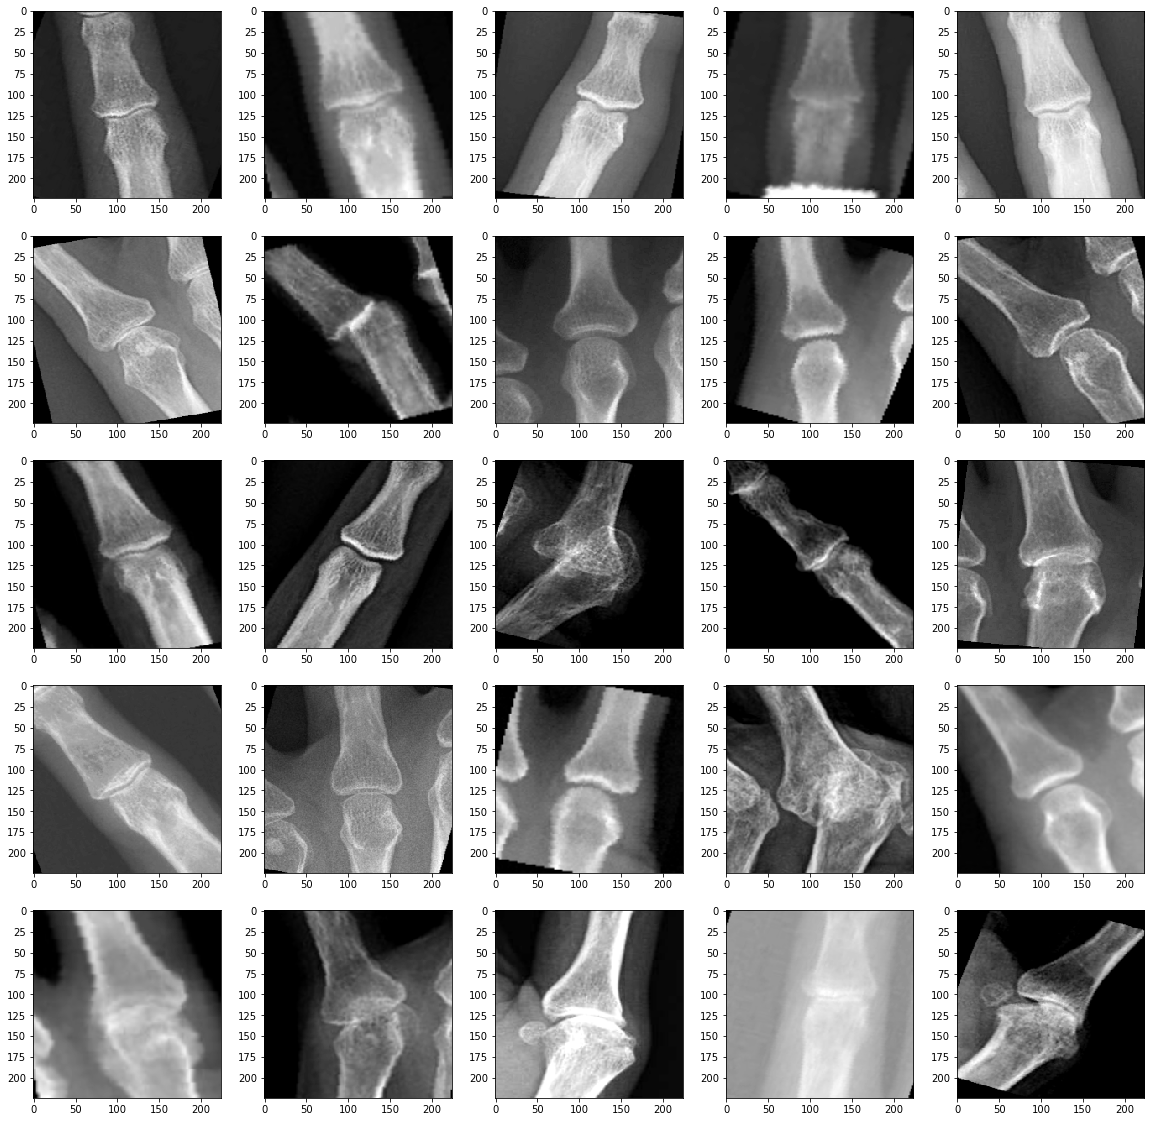

In [23]:
for a,b in train_ds.take(1):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")

In [34]:
erosion_foot_extractor = joint_extractor.width_based_joint_extractor(joint_scale = 4.2, height_scale = 1.2, key_joint_scales = {"mtp":3.2,"mtp_1":3.2}, key_height_scales = {})
train_ds = joint_dataset.feet_joint_dataset(configuration, pad_resize = False, joint_extractor = erosion_foot_extractor).create_feet_joints_dataset(outcomes_source = "/mnt/iusers01/jw01/mdefscs4/ra_challenge/RA_challenge/training_dataset/training.csv")


2020-03-31 15:46:46,077;INFO - Outcome 0, found outliers weights [58.57142857]
2020-03-31 15:46:46,079;INFO - Outcome 0, Updated outlier weights: [6.6104276]
2020-03-31 15:46:46,416;WARNING - Missing permissions to create directory for caching!
2020-03-31 15:46:46,418;WARNING - Missing permissions to create directory for caching!


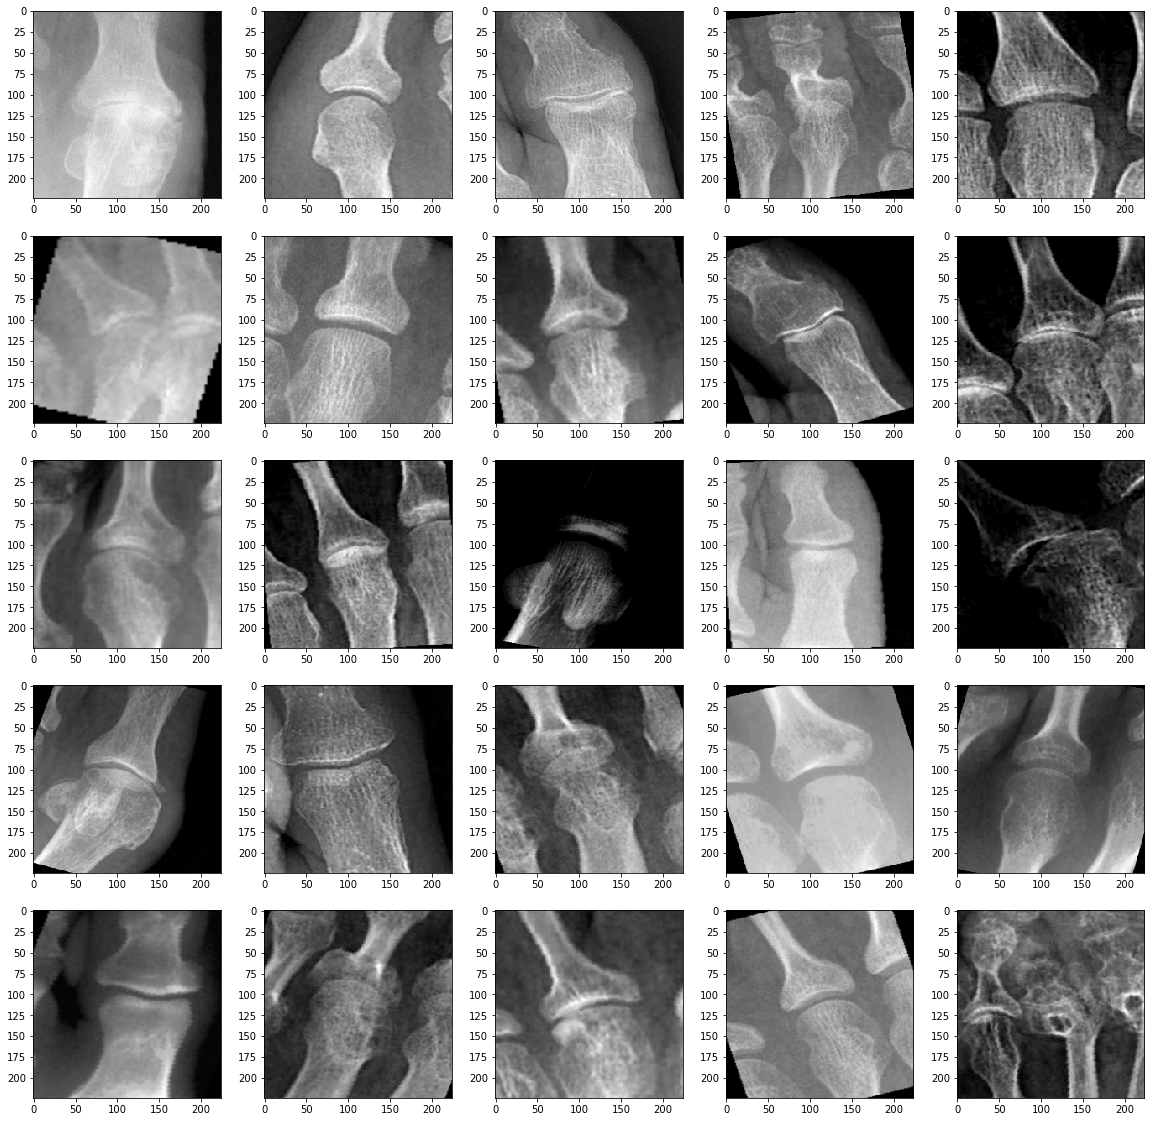

In [35]:
for a,b in train_ds.take(1):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")